# **Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

# **Mount Drive**

In [ ]:
drive.mount("/content/drive")

data = pd.read_csv("/content/drive/MyDrive/creditcard.csv")

print("Data shape:", data.shape)
print("Data head:", data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data shape: (284807, 31)
Data head:    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -

# **Preprocess Data**

In [ ]:
X = data.drop(columns=['Class', 'Time'])
y = data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Train Model**

In [ ]:
epochs = 100
batch_size = 1000
n_batches = int(np.ceil(X_train.shape[0] / batch_size))

# Initialize the SGDClassifier
svm_model = SGDClassifier(loss='hinge', max_iter=1, warm_start=True, random_state=42)

classes = np.unique(y_train)

for epoch in range(epochs):
    for i in range(n_batches):
        start = i * batch_size
        end = (i + 1) * batch_size
        X_batch, y_batch = X_train[start:end], y_train[start:end]
        svm_model.partial_fit(X_batch, y_batch, classes=classes)
    print(f'Epoch {epoch+1}/{epochs} completed')


Epoch 1/100 completed
Epoch 2/100 completed
Epoch 3/100 completed
Epoch 4/100 completed
Epoch 5/100 completed
Epoch 6/100 completed
Epoch 7/100 completed
Epoch 8/100 completed
Epoch 9/100 completed
Epoch 10/100 completed
Epoch 11/100 completed
Epoch 12/100 completed
Epoch 13/100 completed
Epoch 14/100 completed
Epoch 15/100 completed
Epoch 16/100 completed
Epoch 17/100 completed
Epoch 18/100 completed
Epoch 19/100 completed
Epoch 20/100 completed
Epoch 21/100 completed
Epoch 22/100 completed
Epoch 23/100 completed
Epoch 24/100 completed
Epoch 25/100 completed
Epoch 26/100 completed
Epoch 27/100 completed
Epoch 28/100 completed
Epoch 29/100 completed
Epoch 30/100 completed
Epoch 31/100 completed
Epoch 32/100 completed
Epoch 33/100 completed
Epoch 34/100 completed
Epoch 35/100 completed
Epoch 36/100 completed
Epoch 37/100 completed
Epoch 38/100 completed
Epoch 39/100 completed
Epoch 40/100 completed
Epoch 41/100 completed
Epoch 42/100 completed
Epoch 43/100 completed
Epoch 44/100 complet

# **Prediction on our test set**

In [ ]:
y_pred = svm_model.predict(X_test)
y_pred_prob = svm_model.decision_function(X_test)

# **Evalutate Model**

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.59      0.69        98

    accuracy                           1.00     56962
   macro avg       0.91      0.80      0.84     56962
weighted avg       1.00      1.00      1.00     56962



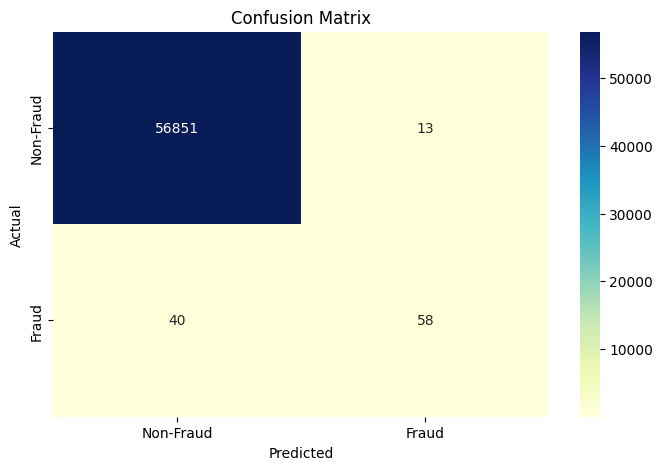

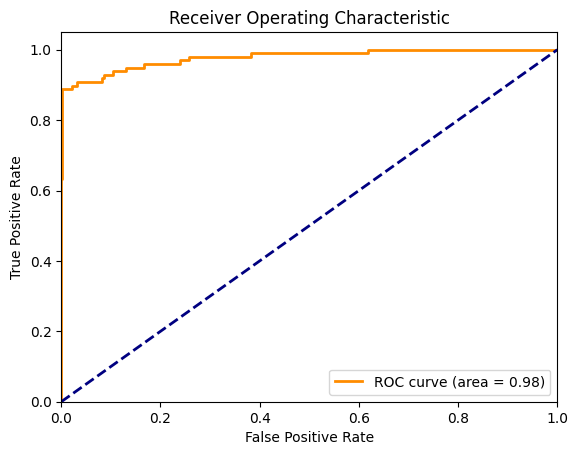

AUC: 0.9780999132911465


In [ ]:
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

print("AUC:", roc_auc_score(y_test, y_pred_prob))